## ANÁLISIS DATOS

1. Importamos las bibliotecas necesarias, así como aquello que se va a necesitar para la tarea.

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import requests
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

import re

# IQR/Z score.
from scipy.stats import stats

# Seleción de variables.
from sklearn.feature_selection import SelectKBest

# Modelos Selección.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Modelos.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold

# Preprocesado.
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
import pickle
# Métricas.
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, classification_report

## Análisis de los datos

1.Cargamos a los datos para poder verlos.

In [2]:
df_trainlab = pd.read_csv("C:\\Users\\magdm\\OneDrive\\Escritorio\\MASTER BIG DATA\\MACHINE LEARNING\TRABAJO FINAL\\Trainingsetlabels.csv", sep = ",")
df_trainval= pd.read_csv("C:\\Users\\magdm\\OneDrive\\Escritorio\MASTER BIG DATA\\MACHINE LEARNING\\TRABAJO FINAL\\Trainingsetvalues.csv", sep = ",")


In [3]:
print('Tamaño de tabla de labels:',df_trainlab.shape[0])
print('Tamaño de tabla de values:',df_trainval.shape[0])

Tamaño de tabla de labels: 59400
Tamaño de tabla de values: 59400


In [4]:
df_trainlab

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [5]:
df_trainval

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


Unimos ambos dataset:

In [6]:
df_full = pd.merge(df_trainlab, df_trainval, on = "id", how = "left")

In [7]:
df_full.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
df_full.shape

(59400, 41)

In [9]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55763 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59398 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

A continuación, se convierte la columna "date_recorded" a un formato de fecha y tiempo más útil, calcula la cantidad de días transcurridos desde la fecha mínima registrada, se extrae el mes y el año de cada fecha registrada, y se elimina la columna original convertida:

In [10]:
# "date_recorded" es un string, se convierte a datatime
df_full["date_recorded"] = pd.to_datetime(df_full["date_recorded"])

df_full["date_recorded_days"] = (df_full["date_recorded"] - df_full["date_recorded"].min()).dt.days

# Month:
df_full["month"] = df_full["date_recorded"].dt.strftime("%B")
df_full["year"] = df_full["date_recorded"].dt.year

# Se elimina la variable original pues ya está convertida a numérica.
df_full.drop(columns = "date_recorded", inplace = True)

In [11]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

2. Observación de la **variable objetivo** en train

Dado que 'status_ group' es la variable que habla sobre es o no funcional o si necesita reparación, siendo la variable objetivo, se le asigna un valor numérico a cada categoría:

In [12]:
df_full["status_group"].replace(('functional', 'non functional', 'functional needs repair'),
                                (0, 1, 2), inplace=True)

Inicialmente, según los datos actuales, que una bomba de agua sea 'functional' (que funcione) es lo más frecuente.

3. Estudio de las **variables numericas**

In [13]:
num_cols = df_full.select_dtypes(exclude=['object','category']).columns

In [14]:
df_full[num_cols].describe()

,id,status_group,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,date_recorded_days,year
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,0.529596,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,3454.383030,2011.921667
std,21453.128371,0.628080,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,334.216374,0.958758
min,0.000000,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2002.000000
25%,18519.750000,0.000000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,3091.000000,2011.000000
50%,37061.500000,0.000000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,3649.000000,2012.000000
75%,55656.500000,1.000000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,3771.000000,2013.000000
max,74247.000000,2.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,4068.000000,2013.000000


In [15]:
num_cols

Index(['id', 'status_group', 'amount_tsh', 'gps_height', 'longitude',
       'latitude', 'num_private', 'region_code', 'district_code', 'population',
       'construction_year', 'date_recorded_days', 'year'],
      dtype='object')

Text(0.5, 1.0, 'Matriz de correlación')

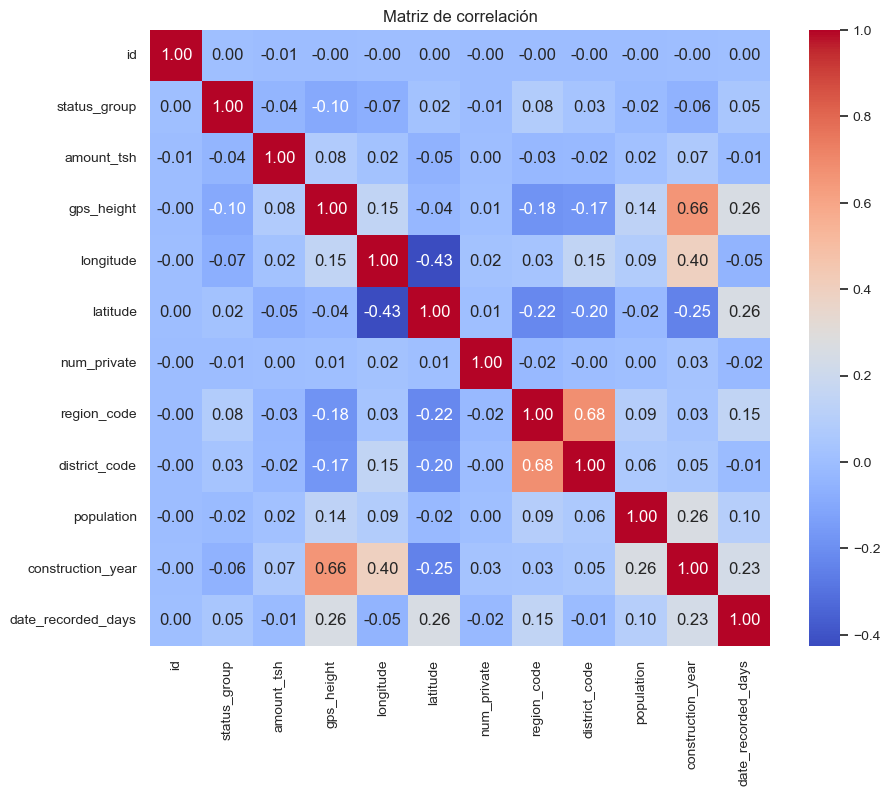

In [16]:
# Matriz de correlación

numeric_cols = df_full.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_full[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')


Se observa en la matriz de correlación que la variable regio_code y distric_code están relacionadas de forma elevada (se valorará entocnes la posibilidad de eliminar una de las dos variables de cara al futuro). De igual forma, construction_year y gps_height también estàn relacionadas.


En versiones anteriores se observa que los valores faltantes están en las variables categoricas, por lo que, antes de pasar al análisis de estas, se procede al **estudio más detallado de las variables numéricas**:

In [17]:
numeric_cols

Index(['id', 'status_group', 'amount_tsh', 'gps_height', 'longitude',
       'latitude', 'num_private', 'region_code', 'district_code', 'population',
       'construction_year', 'date_recorded_days'],
      dtype='object')

- **id** : hace referencia al id de cada una de las bombas. ✔
- **status_group**: se trata de la *variable objetivo*, y está pasada a numerica para poder trabajar con ella. ✔
- **amount_tsh** : Es la cantidad de agua disponible dentro de la bomba. *Estudiar si es importante este punto a la hora de conocer si va a funcionar o no la bomba de agua*.
- **gps_height** : Altitud del pozo.
- **longitude** : Coordenadas GPS *(¿Tendría sentido unirlo con latitude para observar dónde tienden más a no funcionar o a necesitar reparación?)*
- **latitude** : Coordenadas GPS *(misma pregunta que con longitude)*
- **num_private** : Podríamos eliminarla.
- **region_code** : Ubicación geográfica (codificada)
- **district_code** : Ubicación geográfica (codificada)
- **population** : Población alrededor del pozo.
- **construction_year** : Año en que se construyó el punto de agua.
- **date_recorded_days** :date_recorded convertida a numerica. ✔

Como comentaba anteriormente, la cantidad de agua disponible (**amount_tsh**) dentro de la bomba puede ser importante a la hora de conocer si va a funcionar o no la bomba de agua en un futuro:

C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


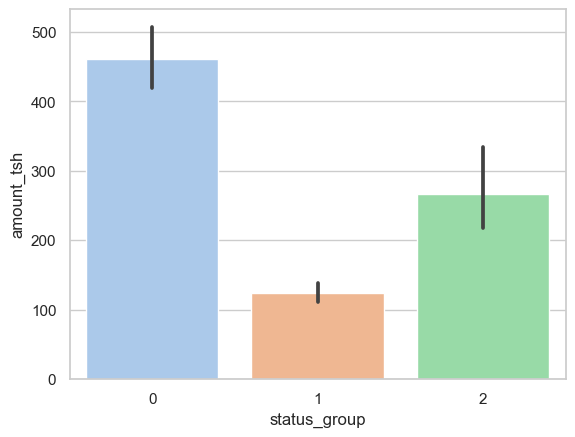

In [18]:
sns.set(style="whitegrid") 
sns.barplot(y=df_full['amount_tsh'], x=df_full['status_group'], palette="pastel")
plt.show()

Observando el gráfico anterior, se puede confirmar que aquellas bombas de agua que contienen menor cantidad de agua son los que no son funcionales, al igual que los que están a la mitad de la cantidad de agua (barra verde), confirma que son los que necesitan reparación.

Se pasa, a continuación, a ver si **existen valores atípicos** en los datos:

C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

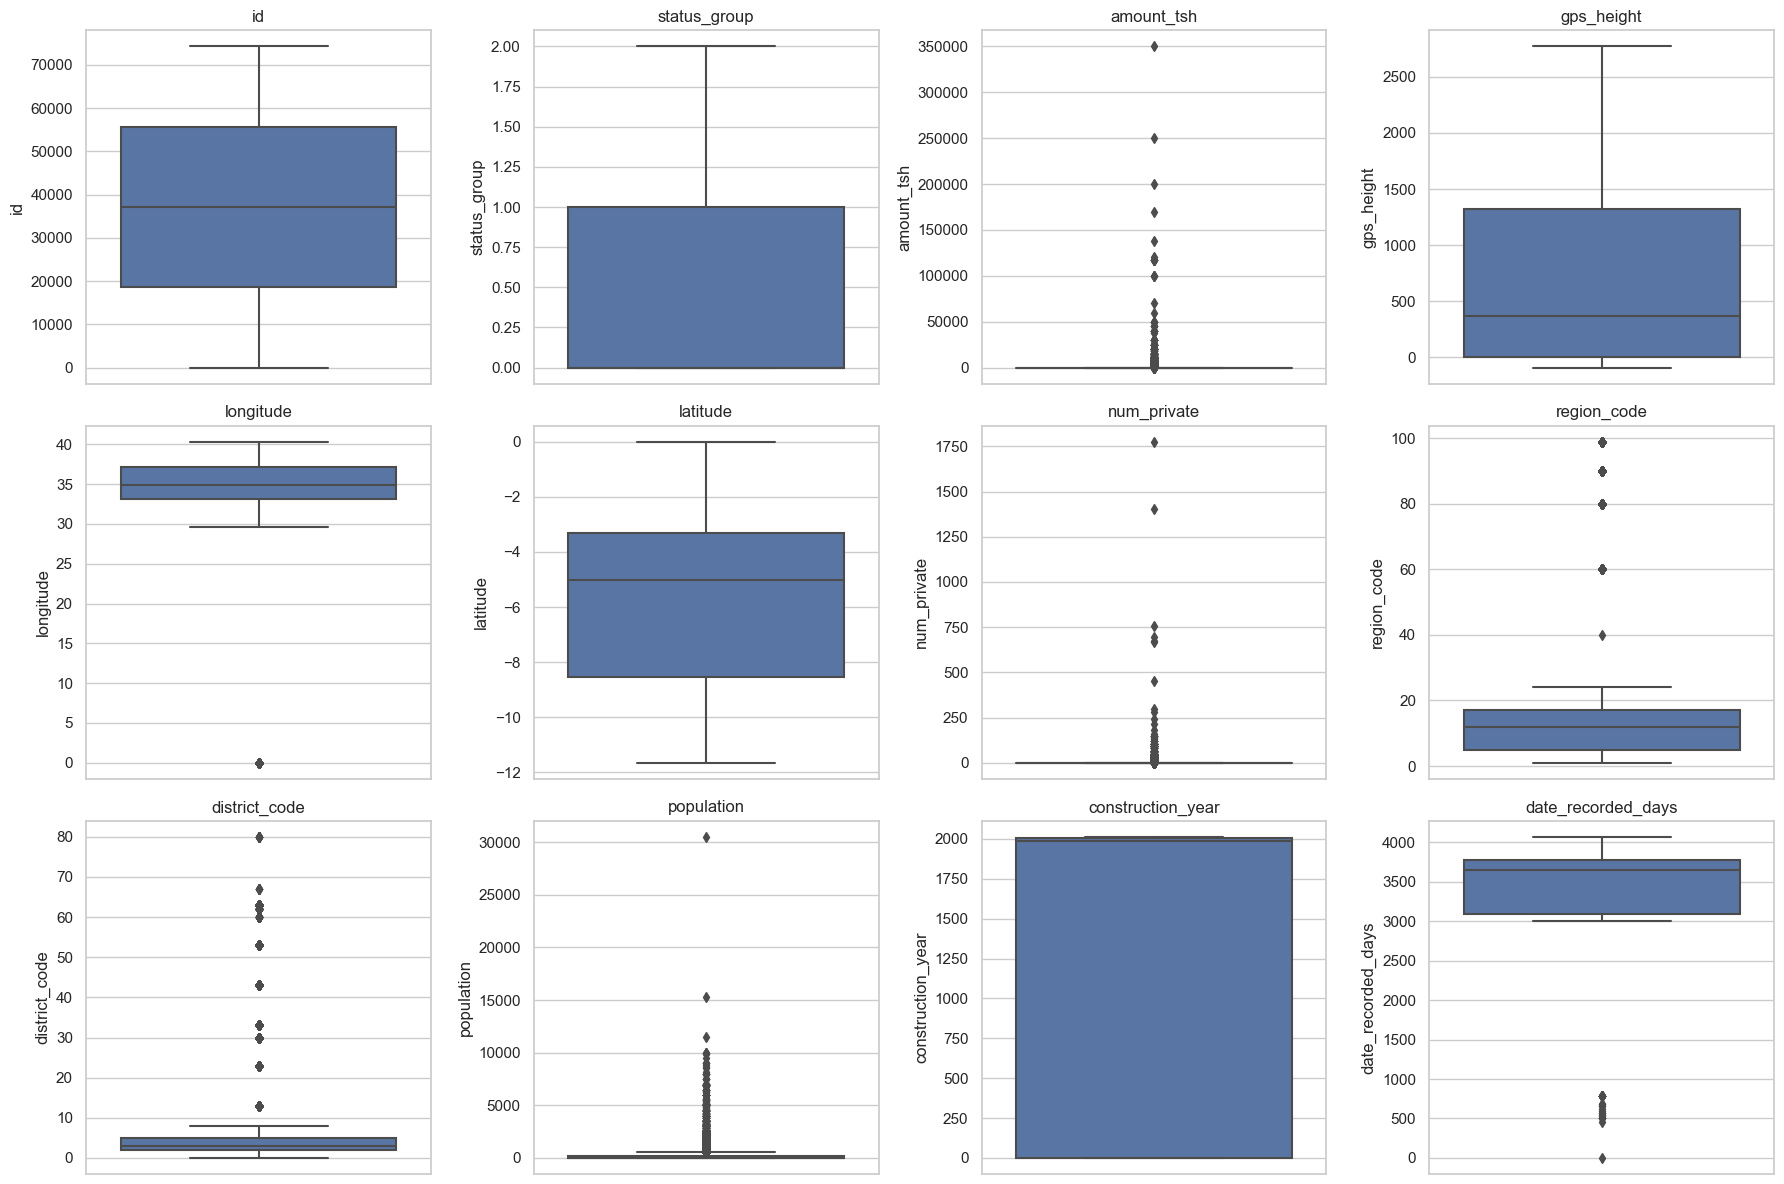

In [19]:
fig = plt.figure(figsize=(18, 12))
cols = 4
rows = (len(numeric_cols) - 1) // cols + 1

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df_full[col])
    plt.title(col)

plt.tight_layout() 
plt.show()


In [19]:
correlation = df_full[numeric_cols].corr()
correlation['status_group'].sort_values(ascending = False)

status_group          1.000000
region_code           0.083590
date_recorded_days    0.045972
district_code         0.033979
latitude              0.021020
id                    0.003354
num_private          -0.006159
population           -0.015198
amount_tsh           -0.043533
construction_year    -0.056893
longitude            -0.071635
gps_height           -0.096408
Name: status_group, dtype: float64

Las variables más importantes a tener en cuenta basadas en las correlaciones con la columna 'status_group':

- **gps_height**: Con una correlación negativa moderada (-0.096408), la altura GPS parece ser la variable más significativa en relación con el estado del grupo. Una mayor altitud GPS tiende a estar asociada con ciertos estados del grupo.
- **longitude** : Aunque la correlación es negativa (-0.071635), es moderada y sugiere una relación importante entre la longitud y el estado del grupo. *Es importante considerar cómo la longitud puede influir en el estado del grupo.*
- **construction_year** : Con una correlación negativa (-0.056893), el año de construcción también parece ser importante. Años de construcción más recientes tienden a estar asociados con ciertos estados del grupo.
- **amount_tsh** : Aunque la correlación es negativa y débil (-0.043533), la cantidad de agua disponible es relevante, tal y como se menciona anteriormente.

C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


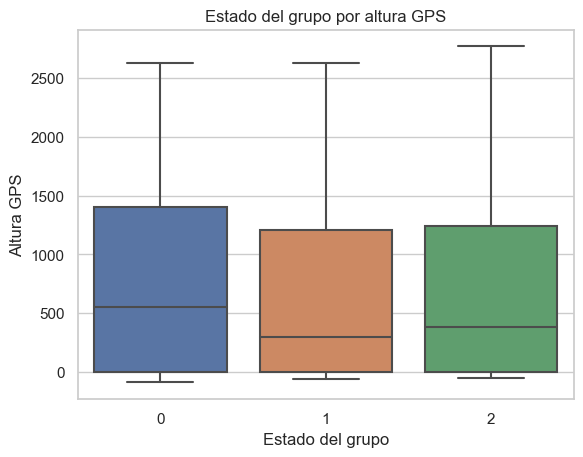

Estadístico F: 395.0077160961534
Valor p: 3.812139045698223e-171


In [20]:
#Para comparar el estado del grupo en diferentes rangos de altura GPS
sns.boxplot(x='status_group', y='gps_height', data=df_full)
plt.title('Estado del grupo por altura GPS')
plt.xlabel('Estado del grupo')
plt.ylabel('Altura GPS')
plt.show()

# Prueba estadística (ANOVA) para verificar si hay diferencias significativas en el estado del grupo según la altura GPS
from scipy.stats import f_oneway

grouped_data = [group['gps_height'] for name, group in df_full.groupby('status_group')]
f_statistic, p_value = f_oneway(*grouped_data)
print("Estadístico F:", f_statistic)
print("Valor p:", p_value)



La altura GPS parece ser un factor importante que está asociado con diferencias en el estado del grupo.

C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

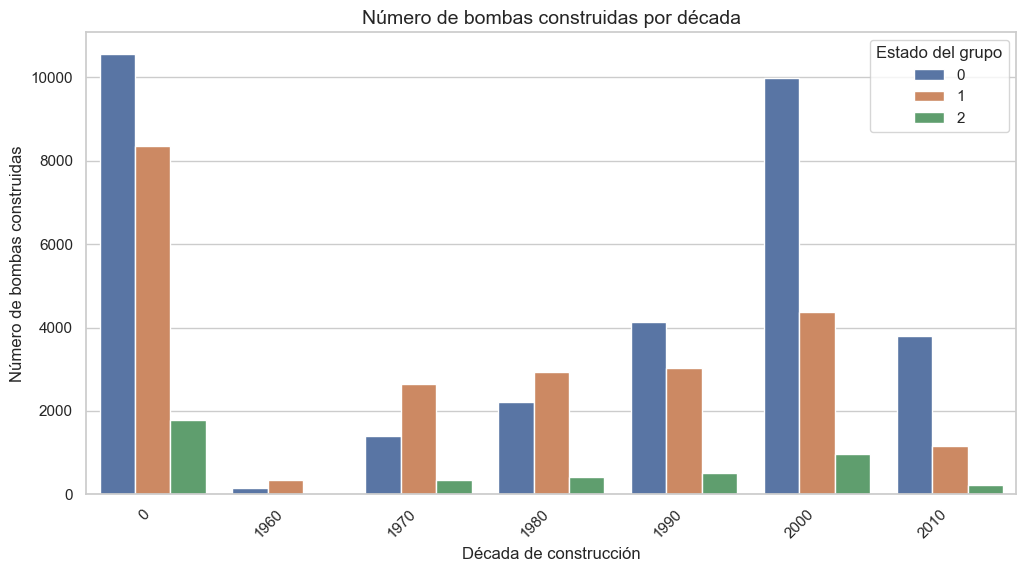

In [21]:
# los años de construcción por décadas
df_full['construction_decade'] = (df_full['construction_year'] // 10) * 10

# el gráfico de conteo
plt.figure(figsize=(12, 6))
sns.countplot(x=df_full['construction_decade'], hue=df_full['status_group'])

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')
plt.title('Número de bombas construidas por década', fontsize=14)
plt.xlabel('Década de construcción', fontsize=12)
plt.ylabel('Número de bombas construidas', fontsize=12)

plt.legend(title='Estado del grupo', loc='upper right')

plt.show()

Recordemos que: 

- **0** : funciona, 
- **1** : no funciona, 
- **2** : necesita reparación.

Por lo que, observando gráfico podemos ver que las anteriores a 1980 la mayoría no funcionan, mientras que a partir de esta fecha, casi todas funcionan. Aquellas que aparecen en el año 0 se considera qeu son los outliers.

In [23]:
# Número de valores faltantes por característica
missing_values = df_full.isnull().sum()
print("Número de valores faltantes por característica:")
print(missing_values)

Número de valores faltantes por característica:
id                           0
status_group                 0
amount_tsh                   0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type          

se observa que no hay valores faltantes para las variables categoricas, asique se pasa al análisis de este tipo de variables.

4. Estudio de las **variables categóricas**

In [24]:
cat_cols= df_full.select_dtypes(include=['object','category']).columns

In [25]:
df_full[cat_cols].describe()

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,month
count,55763,55745,59398,59400,59029,59400,59400,59400,56066,59400,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,1896,2145,37399,9,19287,21,125,2092,2,1,...,8,6,5,5,10,7,3,7,6,12
top,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,March
freq,9084,17402,3563,10248,508,5294,2503,307,51011,59400,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,17936


In [26]:
df_full.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [27]:
#vemos los valores faltantes de las categoricas

df_full[cat_cols].isna().sum().sort_values(ascending=False)

scheme_name              28810
scheme_management         3878
installer                 3655
funder                    3637
public_meeting            3334
permit                    3056
subvillage                 371
wpt_name                     2
quality_group                0
quantity                     0
quantity_group               0
source                       0
payment_type                 0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
water_quality                0
extraction_type_class        0
payment                      0
management_group             0
management                   0
extraction_type_group        0
extraction_type              0
recorded_by                  0
ward                         0
lga                          0
region                       0
basin                        0
month                        0
dtype: int64

In [28]:
cat_cols

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'month'],
      dtype='object')

Se comienza a continuación con el **estudio de las variables categoricas**:

C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


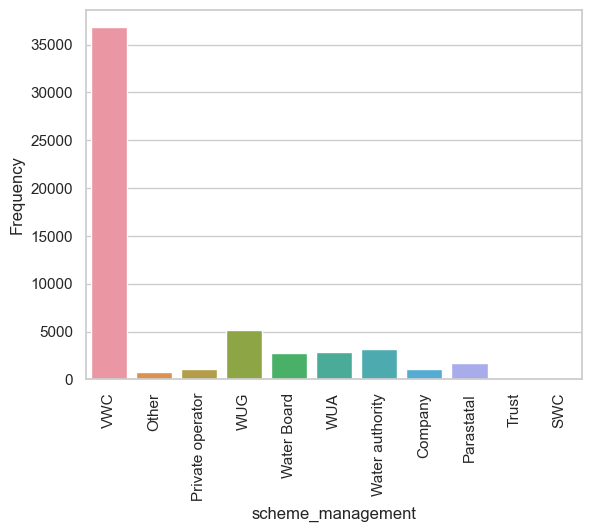

In [29]:
sns.countplot(x = 'scheme_management', data = df_full)
plt.xticks (rotation = 90)
plt.ylabel('Frequency')
plt.show()

Volviendo nuevamente, a las variables que contienen los datos:

- **id** : hace referencia al id de cada una de las bombas. ✔ 
- **status_group**: se trata de la *variable objetivo*, y está pasada a numerica para poder trabajar con ella. ✔
- **amount_tsh** : Es la cantidad de agua disponible dentro de la bomba. *Estudiar si es importante este punto a la hora de conocer si va a funcionar o no la bomba de agua*. YA ESTUDIADA ✔
- **gps_height** : Altitud del pozo.YA ESTUDIADA ✔
- **longitude** : Coordenadas GPS *(¿Tendría sentido unirlo con latitude para observar dónde tienden más a no funcionar o a necesitar reparación?)*
- **latitude** : Coordenadas GPS *(misma pregunta que con longitude)*
- **num_private** : Podríamos eliminarla. SE ELIMINA POR INNECESARIA.
- **region_code** : Ubicación geográfica (codificada)
- **district_code** : Ubicación geográfica (codificada)
- **population** : Población alrededor del pozo.
- **construction_year** : Año en que se construyó el punto de agua. ✔
- **date_recorded_days** :date_recorded convertida a numerica. ✔

A continuación, se elimina num_private por innecesaria (ya que no se puede interpretar):

In [30]:
df_full.drop(columns=["num_private"], inplace=True)
df_full.drop(columns=["wpt_name"], inplace=True)

Las variables categoricas eran las que contenian valores faltantes, tal y como hemos visto antes, por lo que se pasa a su tratammiento:

In [31]:
# Analizar valores faltantes
missing_values = df_full[['scheme_name', 'scheme_management', 'installer', 'funder', 'public_meeting', 'permit', 'subvillage']].isnull().sum()
print("Valores faltantes por variable:")
print(missing_values)


Valores faltantes por variable:
scheme_name          28810
scheme_management     3878
installer             3655
funder                3637
public_meeting        3334
permit                3056
subvillage             371
dtype: int64


In [32]:
for col in ['scheme_name', 'scheme_management', 'installer', 'funder', 'public_meeting', 'permit', 'subvillage']:
    unique_values = df_full[col].nunique()
    print(f"Valores únicos en {col}: {unique_values}")

Valores únicos en scheme_name: 2695
Valores únicos en scheme_management: 11
Valores únicos en installer: 2145
Valores únicos en funder: 1896
Valores únicos en public_meeting: 2
Valores únicos en permit: 2
Valores únicos en subvillage: 19287


In [33]:
# Se imputa valores faltantes con la moda (valor más común)
df_full['scheme_management'].fillna(df_full['scheme_management'].mode()[0], inplace=True)
df_full['installer'].fillna(df_full['installer'].mode()[0], inplace=True)
df_full['funder'].fillna(df_full['funder'].mode()[0], inplace=True)
df_full['public_meeting'].fillna(df_full['public_meeting'].mode()[0], inplace=True)
df_full['permit'].fillna(df_full['permit'].mode()[0], inplace=True)
df_full['subvillage'].fillna(df_full['subvillage'].mode()[0], inplace=True)

C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

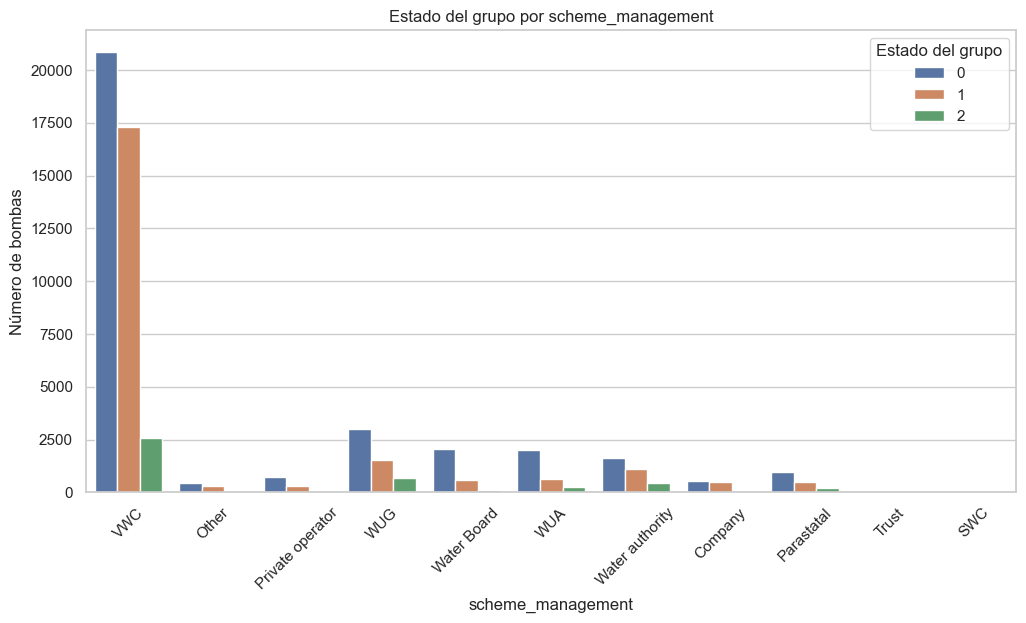

C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

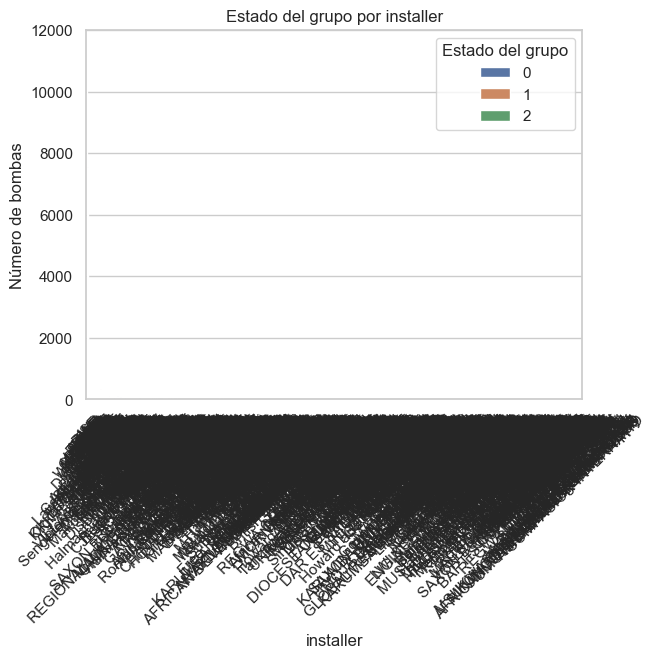

C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

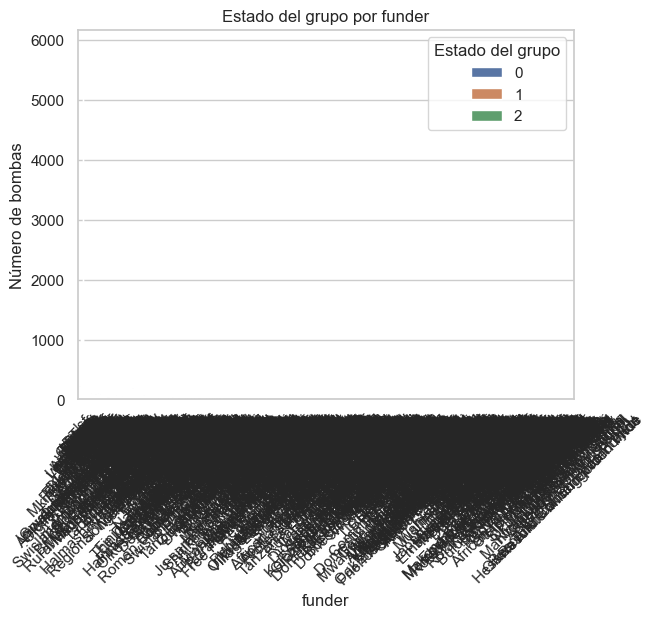

C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

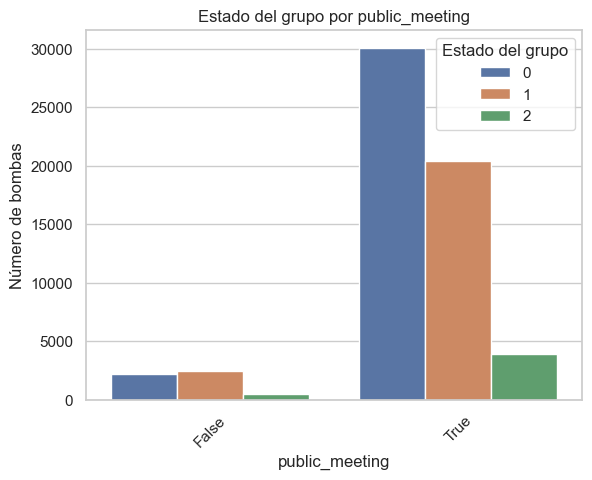

C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

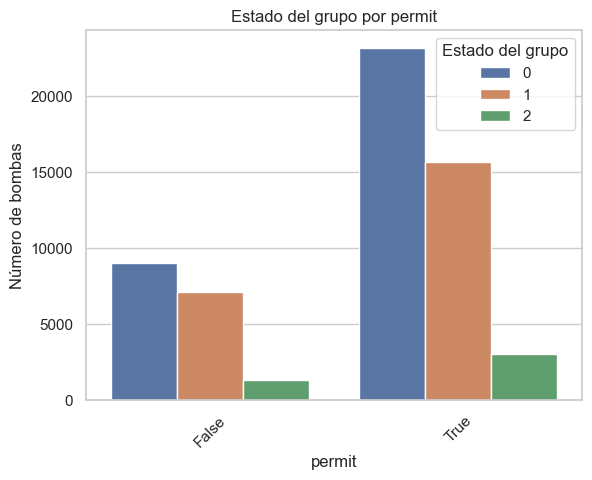

In [34]:
plt.figure(figsize=(12, 6))
for col in ['scheme_management', 'installer', 'funder', 'public_meeting', 'permit']:
    sns.countplot(x=col, hue='status_group', data=df_full)
    plt.xticks(rotation=45)
    plt.title(f'Estado del grupo por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de bombas')
    plt.legend(title='Estado del grupo', loc='upper right')
    plt.show()

In [35]:
df_full.isna().sum().sort_values(ascending=False)

scheme_name              28810
id                           0
quantity                     0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity_group               0
extraction_type              0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
date_recorded_days           0
month                        0
year                         0
extraction_type_group        0
construction_year            0
status_group                 0
permit                       0
amount_tsh                   0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
basin                        0
subvillage                   0
region  

In [36]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  int64  
 2   amount_tsh             59400 non-null  float64
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   basin                  59400 non-null  object 
 9   subvillage             59400 non-null  object 
 10  region                 59400 non-null  object 
 11  region_code            59400 non-null  int64  
 12  district_code          59400 non-null  int64  
 13  lga                    59400 non-null  object 
 14  ward                   59400 non-null  object 
 15  po

In [37]:
num_cols = df_full.select_dtypes(exclude=['object','category']).columns

In [38]:
num_cols

Index(['id', 'status_group', 'amount_tsh', 'gps_height', 'longitude',
       'latitude', 'region_code', 'district_code', 'population',
       'public_meeting', 'permit', 'construction_year', 'date_recorded_days',
       'year', 'construction_decade'],
      dtype='object')

In [39]:
num_cols = (['id', 'status_group', 'amount_tsh', 'gps_height', 'longitude',
       'latitude', 'region_code', 'district_code', 'population',
       'public_meeting', 'permit', 'construction_year', 'date_recorded_days',
       'year'])

In [40]:
cat_cols= df_full.select_dtypes(include=['object','category']).columns

In [41]:
cat_cols

Index(['funder', 'installer', 'basin', 'subvillage', 'region', 'lga', 'ward',
       'recorded_by', 'scheme_management', 'scheme_name', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group', 'month'],
      dtype='object')

C:\Users\magdm\AppData\Local\Temp\ipykernel_19968\3048869309.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, bins=20, ax=axs[index])
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\magdm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_

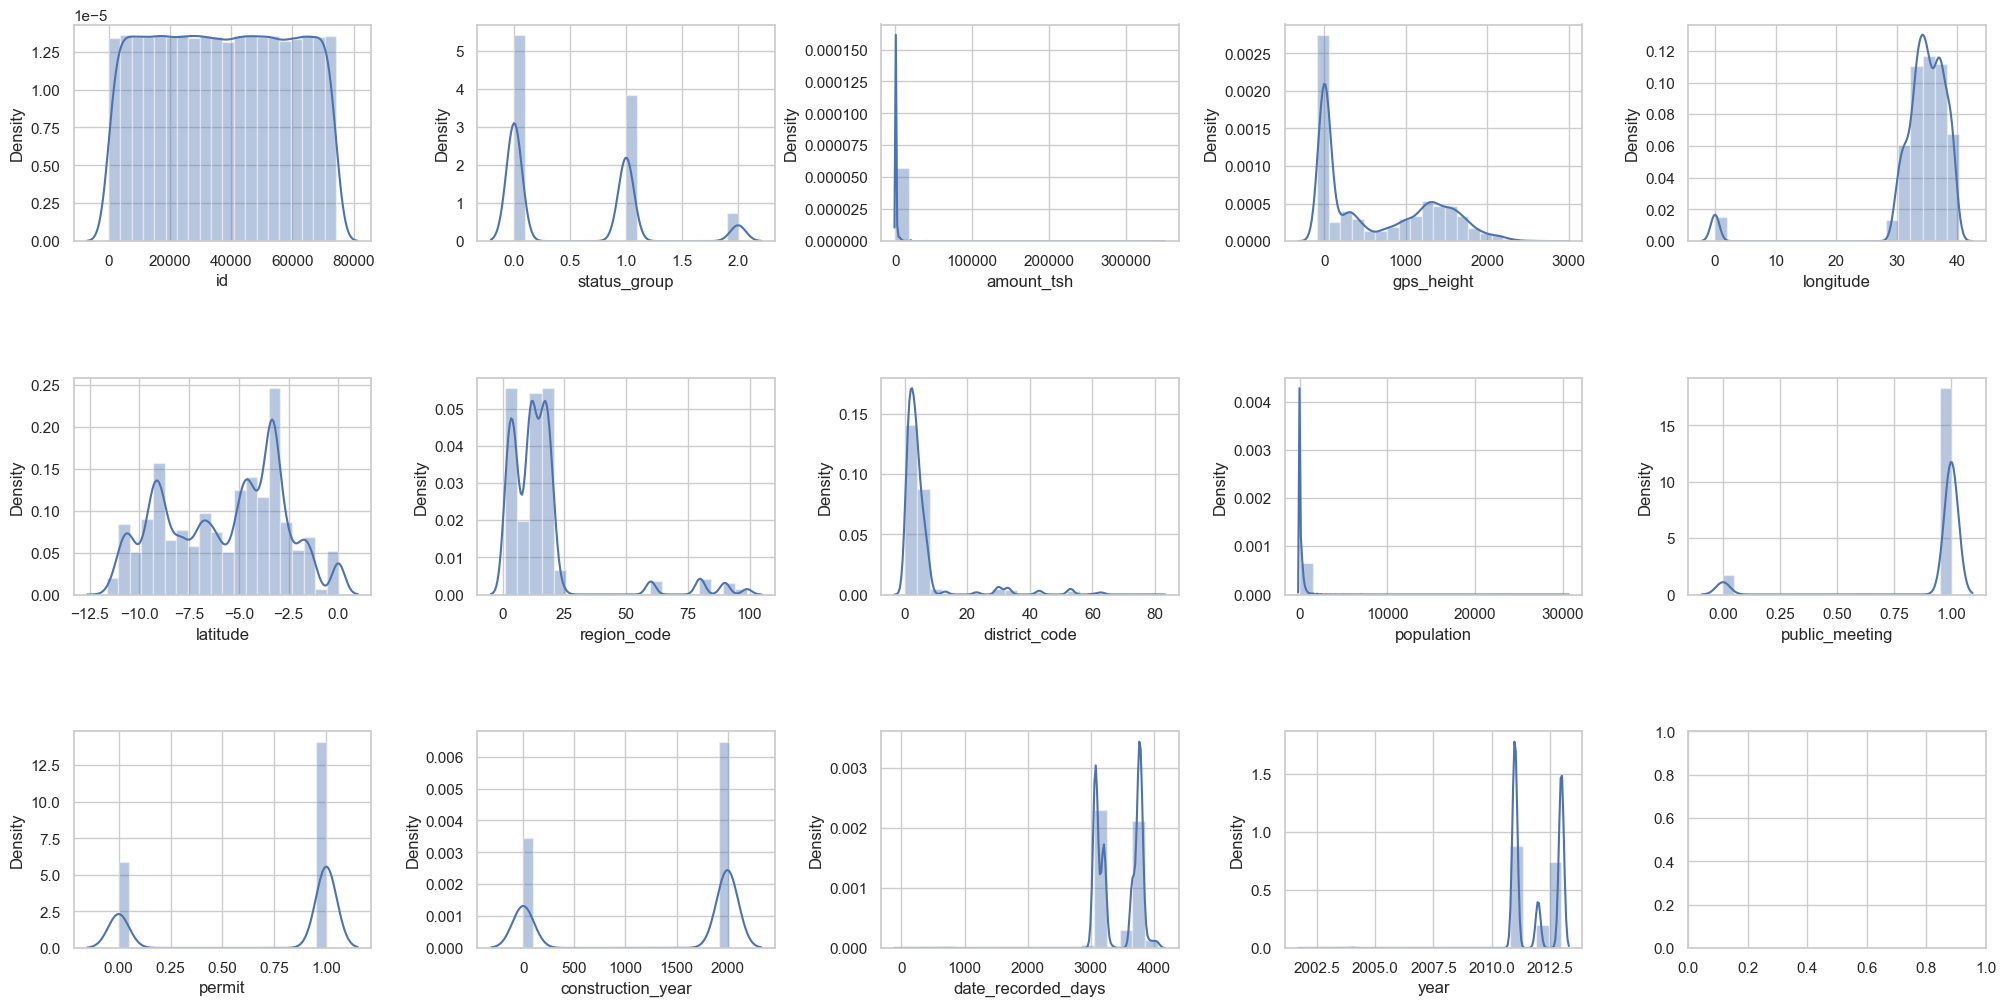

In [42]:
#Variables numéricas
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
axs = axs.flatten() # 

index = 0
for k,v in df_full[num_cols].items(): 
    if  (k == 'permanencia'):
        sns.countplot(v, ax=axs[index])
    else:
        sns.distplot(v, bins=20, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Transformación variables a numéricas

In [43]:
df_full.dtypes

id                         int64
status_group               int64
amount_tsh               float64
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting              bool
recorded_by               object
scheme_management         object
scheme_name               object
permit                      bool
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_gr

In [44]:
# Importar LabelEncoder de sklearn
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
label_encoder = LabelEncoder()

# Iterar sobre las columnas categóricas y aplicar la codificación ordinal
for col in cat_cols:
    df_full[col] = label_encoder.fit_transform(df_full[col].astype(str))


In [45]:
df_full.dtypes

id                         int64
status_group               int64
amount_tsh               float64
funder                     int32
gps_height                 int64
installer                  int32
longitude                float64
latitude                 float64
basin                      int32
subvillage                 int32
region                     int32
region_code                int64
district_code              int64
lga                        int32
ward                       int32
population                 int64
public_meeting              bool
recorded_by                int32
scheme_management          int32
scheme_name                int32
permit                      bool
construction_year          int64
extraction_type            int32
extraction_type_group      int32
extraction_type_class      int32
management                 int32
management_group           int32
payment                    int32
payment_type               int32
water_quality              int32
quality_gr

In [46]:
df_full_total = df_full.copy()

In [47]:
df_full_total.drop(columns=["construction_decade"], inplace=True)

Primera vez haciendo division de datos y train y test

In [48]:
from sklearn.model_selection import train_test_split

# Especifica las características (X) y la variable objetivo (y)
X = df_full_total.drop(columns=['status_group'])  # Características
y = df_full_total['status_group']  # Variable objetivo

# División de los datos en train y test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (47520, 40)
Forma de X_test: (11880, 40)
Forma de y_train: (47520,)
Forma de y_test: (11880,)


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Clasificador Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

# Métrica
from sklearn.metrics import accuracy_score, confusion_matrix

# Análisis de Componentes Principales
from sklearn import decomposition

### RANDOM FOREST


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inicializar el clasificador de Bosque Aleatorio
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo en los datos de entrenamiento
random_forest.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = random_forest.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.8128787878787879
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      6457
           1       0.84      0.79      0.81      4572
           2       0.57      0.36      0.44       851

    accuracy                           0.81     11880
   macro avg       0.74      0.68      0.70     11880
weighted avg       0.81      0.81      0.81     11880



A través del randomforest se obtiene un 0,81.

# MODELO DE TEST

Se llama al cv del test:

In [51]:
df_test = pd.read_csv("C:\\Users\\magdm\\OneDrive\\Escritorio\\MASTER BIG DATA\\MACHINE LEARNING\TRABAJO FINAL\\Testsetvalues.csv")

Se llama a las labels y se hace un merge con el df_test:

In [52]:
df_test

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [53]:
# "date_recorded" es un string, se convierte a datatime
df_test["date_recorded"] = pd.to_datetime(df_test["date_recorded"])

df_test["date_recorded_days"] = (df_test["date_recorded"] - df_test["date_recorded"].min()).dt.days

# Month:
df_test["month"] = df_test["date_recorded"].dt.strftime("%B")
df_test["year"] = df_test["date_recorded"].dt.year

# Se elimina la variable original pues ya está convertida a numérica.
df_test.drop(columns = "date_recorded", inplace = True)

In [54]:
num_cols_test = df_test.select_dtypes(exclude=['object','category']).columns

In [55]:
cat_cols_test= df_test.select_dtypes(include=['object','category']).columns

In [56]:
df_test.drop(columns=["num_private"], inplace=True)
df_test.drop(columns=["wpt_name"], inplace=True)

In [57]:
df_test.isna().sum().sort_values(ascending=False)

scheme_name              7242
scheme_management         969
installer                 877
funder                    870
public_meeting            821
permit                    737
subvillage                 99
id                          0
quantity                    0
payment                     0
payment_type                0
water_quality               0
quality_group               0
source                      0
quantity_group              0
management                  0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
date_recorded_days          0
month                       0
management_group            0
construction_year           0
extraction_type_class       0
extraction_type_group       0
extraction_type             0
amount_tsh                  0
recorded_by                 0
population                  0
ward                        0
lga                         0
district_code               0
region_cod

In [59]:
 # Analizar valores faltantes
missing_values_test = df_test[['scheme_name', 'scheme_management', 'installer', 'funder', 'public_meeting', 'permit', 'subvillage']].isnull().sum()
print("Valores faltantes por variable:")
print(missing_values_test)


Valores faltantes por variable:
scheme_name          7242
scheme_management     969
installer             877
funder                870
public_meeting        821
permit                737
subvillage             99
dtype: int64


In [60]:
# Se imputa valores faltantes con la moda (valor más común)
df_test['scheme_management'].fillna(df_test['scheme_management'].mode()[0], inplace=True)
df_test['installer'].fillna(df_test['installer'].mode()[0], inplace=True)
df_test['funder'].fillna(df_test['funder'].mode()[0], inplace=True)
df_test['public_meeting'].fillna(df_test['public_meeting'].mode()[0], inplace=True)
df_test['permit'].fillna(df_test['permit'].mode()[0], inplace=True)
df_test['subvillage'].fillna(df_test['subvillage'].mode()[0], inplace=True)


In [61]:
df_test.isna().sum().sort_values(ascending=False)

scheme_name              7242
id                          0
extraction_type             0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
date_recorded_days          0
month                       0
extraction_type_group       0
construction_year           0
amount_tsh                  0
region                      0
funder                      0
gps_height                  0
installer                   0
longitude                   0
latitude                    0
basin                       0
subvillage                  0
region_code                 0
permit                      0
district_code               0
lga       

In [62]:
df_test.dtypes

id                         int64
amount_tsh               float64
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting              bool
recorded_by               object
scheme_management         object
scheme_name               object
permit                      bool
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity  

In [66]:
cat_cols_test

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'month'],
      dtype='object')

In [68]:
cat_cols_test = ['funder', 'installer', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'month']

In [69]:
# Importar LabelEncoder de sklearn
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
label_encoder = LabelEncoder()

# Iterar sobre las columnas categóricas y aplicar la codificación ordinal
for col in cat_cols_test:
    df_test[col] = label_encoder.fit_transform(df_test[col].astype(str))


In [70]:
df_test

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,date_recorded_days,month,year
0,50785,0.0,834,1996,227,35.290799,-4.059696,0,3916,8,...,3,3,5,3,1,6,5,4333,3,2013
1,51630,0.0,78,1569,235,36.656709,-3.309214,5,2717,0,...,2,2,8,6,0,1,1,4333,3,2013
2,17168,0.0,78,1567,235,34.767863,-5.004344,0,5398,18,...,2,2,5,3,1,6,5,4330,3,2013
3,45559,0.0,44,267,285,38.058046,-9.418672,7,2795,7,...,0,0,7,5,0,6,5,4320,4,2013
4,49871,500.0,670,1260,886,35.006123,-10.950412,7,3544,16,...,1,1,8,6,0,1,1,4384,7,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,468,34,241,38.852669,-6.582841,8,8402,14,...,1,1,6,4,1,1,1,3622,3,2011
14846,18990,1000.0,122,0,355,37.451633,-5.350428,5,5028,20,...,2,2,7,5,0,4,3,3647,7,2011
14847,28749,0.0,78,1476,235,34.739804,-4.585587,0,1833,18,...,2,2,0,1,1,1,1,4361,7,2013
14848,33492,0.0,69,998,235,35.432732,-10.584159,1,6246,16,...,2,2,6,4,1,1,1,4347,3,2013


### RANDOM FOREST

In [71]:
# Entrenar el modelo en los datos de entrenamiento
random_forest.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = random_forest.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mostrar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.8128787878787879
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      6457
           1       0.84      0.79      0.81      4572
           2       0.57      0.36      0.44       851

    accuracy                           0.81     11880
   macro avg       0.74      0.68      0.70     11880
weighted avg       0.81      0.81      0.81     11880



In [72]:
# Hacer predicciones con el modelo entrenado
predictions_rf = random_forest.predict(df_test)


In [73]:
label_encoder.fit(['functional', 'non functional', 'functional needs repair'])

LabelEncoder()

In [74]:
# Convertir las predicciones numéricas a las etiquetas originales
predicted_labels = label_encoder.inverse_transform(predictions_rf)

# Mostrar las predicciones convertidas
print(predicted_labels)


['functional' 'functional' 'functional' ... 'functional' 'functional'
 'functional needs repair']


### Comprobacion de otros modelos:

### xgboost

In [75]:
from xgboost import XGBClassifier
import xgboost as xgb

In [76]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [77]:
predictions_train = model_xgb.predict(X_train)

# Realizar predicciones en el conjunto de prueba
predictions_test = model_xgb.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, predictions_train)
accuracy_test = accuracy_score(y_test, predictions_test)

print("Exactitud en conjunto de entrenamiento:", accuracy_train)
print("Exactitud en conjunto de prueba:", accuracy_test)


Exactitud en conjunto de entrenamiento: 0.8565235690235691
Exactitud en conjunto de prueba: 0.8007575757575758


### Support Vector Machines (SVM)

In [79]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Crear y entrenar el modelo SVM
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

### GradientBoostingClassifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear y entrenar el modelo GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)  # Asegúrate de haber definido X_train e y_train correctamente

# Realizar predicciones en el conjunto de datos de prueba
predictions_gb = model_gb.predict(df_test)

### LogisticRegression

In [82]:
from sklearn.linear_model import LogisticRegression

# Inicializar el clasificador de Regresión Logística
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo en los datos de entrenamiento
logistic_regression.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
predictions_test_lr = logistic_regression.predict(df_test)

# Mostrar las predicciones
print("Predicciones en los datos de prueba (Regresión Logística):")
print(predictions_test_lr)


Predicciones en los datos de prueba (Regresión Logística):
[0 0 1 ... 1 1 1]


C:\Users\magdm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### FINAL

In [86]:
label_encoder.fit(['functional', 'non functional', 'functional needs repair'])

# Convertir las predicciones numéricas a las etiquetas originales
predicted_labels = label_encoder.inverse_transform(predictions_test_lr)

# Mostrar las predicciones convertidas
print(predicted_labels)

pd.DataFrame({"id": df_test["id"], "status_group": predicted_labels}).to_csv("C:\\Users\\magdm\\OneDrive\\Escritorio\\MASTER BIG DATA\\MACHINE LEARNING\TRABAJO FINAL\\Submission_v8_final.csv", index=False)

['functional' 'functional' 'functional needs repair' ...
 'functional needs repair' 'functional needs repair'
 'functional needs repair']


### EXTRA 
##### Para comprobación de que la subida se esté haciendo bien

In [83]:
from pycaret.classification import setup, compare_models, create_model, save_model, load_model, predict_model, finalize_model
import pandas as pd

import pandas as pd

# Configuración de PyCaret
setup(data=df_full_total, target='status_group')

# Comparación de modelos (opcional)
best_model = compare_models()

# Comparación de modelos para encontrar el mejor
best_model = compare_models()

# Entrenar el mejor modelo
final_model = finalize_model(best_model)

# Hacer predicciones en los datos de prueba
predictions = predict_model(final_model, data=df_test)

# Mostrar las predicciones
print(predictions)


,Description,Value
0,Session id,220
1,Target,status_group
2,Target type,Multiclass
3,Original data shape,"(59400, 41)"
4,Transformed data shape,"(59400, 41)"
5,Transformed train set shape,"(41580, 41)"
6,Transformed test set shape,"(17820, 41)"
7,Numeric features,38
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8051,0.9059,0.8051,0.7996,0.7985,0.6349,0.6385,0.9190
xgboost,Extreme Gradient Boosting,0.7983,0.8998,0.7983,0.7947,0.7874,0.6162,0.6239,0.4750
et,Extra Trees Classifier,0.7946,0.8976,0.7946,0.7888,0.7902,0.6197,0.6211,0.8190
lightgbm,Light Gradient Boosting Machine,0.7917,0.8935,0.7917,0.7924,0.7784,0.5997,0.6119,0.6530
gbc,Gradient Boosting Classifier,0.7534,0.8580,0.7534,0.7600,0.7314,0.5160,0.5392,5.2650
dt,Decision Tree Classifier,0.7382,0.7692,0.7382,0.7404,0.7392,0.5281,0.5281,0.1450
ada,Ada Boost Classifier,0.7228,0.8079,0.7228,0.7162,0.6962,0.4543,0.4748,0.5040
ridge,Ridge Classifier,0.6354,0.0000,0.6354,0.5899,0.6013,0.2751,0.2903,0.0560
lda,Linear Discriminant Analysis,0.6304,0.7064,0.6304,0.6140,0.6068,0.2776,0.2897,0.1010
qda,Quadratic Discriminant Analysis,0.5985,0.7442,0.5985,0.6575,0.6194,0.3332,0.3404,0.0800


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8051,0.9059,0.8051,0.7996,0.7985,0.6349,0.6385,0.9290
xgboost,Extreme Gradient Boosting,0.7983,0.8998,0.7983,0.7947,0.7874,0.6162,0.6239,0.4890
et,Extra Trees Classifier,0.7946,0.8976,0.7946,0.7888,0.7902,0.6197,0.6211,0.7800
lightgbm,Light Gradient Boosting Machine,0.7917,0.8935,0.7917,0.7924,0.7784,0.5997,0.6119,0.7540
gbc,Gradient Boosting Classifier,0.7534,0.8580,0.7534,0.7600,0.7314,0.5160,0.5392,5.2880
dt,Decision Tree Classifier,0.7382,0.7692,0.7382,0.7404,0.7392,0.5281,0.5281,0.1450
ada,Ada Boost Classifier,0.7228,0.8079,0.7228,0.7162,0.6962,0.4543,0.4748,0.5080
ridge,Ridge Classifier,0.6354,0.0000,0.6354,0.5899,0.6013,0.2751,0.2903,0.0540
lda,Linear Discriminant Analysis,0.6304,0.7064,0.6304,0.6140,0.6068,0.2776,0.2897,0.0910
qda,Quadratic Discriminant Analysis,0.5985,0.7442,0.5985,0.6575,0.6194,0.3332,0.3404,0.0800


          id  amount_tsh  funder  gps_height  installer  longitude   latitude  \
0      50785         0.0     834        1996        227  35.290798  -4.059696   
1      51630         0.0      78        1569        235  36.656708  -3.309214   
2      17168         0.0      78        1567        235  34.767864  -5.004344   
3      45559         0.0      44         267        285  38.058044  -9.418673   
4      49871       500.0     670        1260        886  35.006123 -10.950412   
...      ...         ...     ...         ...        ...        ...        ...   
14845  39307         0.0     468          34        241  38.852669  -6.582841   
14846  18990      1000.0     122           0        355  37.451633  -5.350428   
14847  28749         0.0      78        1476        235  34.739803  -4.585587   
14848  33492         0.0      69         998        235  35.432732 -10.584159   
14849  68707         0.0      78         481        338  34.765053 -11.226012   

       basin  subvillage  r

In [85]:
predictions['status_group'] = predictions['prediction_label'].map({0: 'functional', 1: 'functional needs repair', 2: 'non functional'})

# Añadir las predicciones al DataFrame de prueba
df_test['status_group'] = predictions['status_group']

pd.DataFrame({"id": df_test["id"], "status_group": predictions['status_group']}).to_csv("C:\\Users\\magdm\\OneDrive\\Escritorio\\MASTER BIG DATA\\MACHINE LEARNING\TRABAJO FINAL\\Submission_v7_predictions_pycaret_v2.csv", index=False)

Se ha tratado de reflejar en la subida a la plataforma el mejor modelo obtenido, sin embargo, no he sido capaz de conseguir más de 0,51 de score, teniendo un accuracy de 0,81. 
Finalmente, en el notebook, he usado pycaret para tratar de ver si estaba escogiendo de forma correcta el mejor modelo.
